<a href="https://colab.research.google.com/github/parksj0923/KORartilleryman/blob/master/5corps_hackerthon/resnet_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_path = '../content/drive/MyDrive/Deep learning exercise/CK+48'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-sadness

Loaded the images of dataset-fear

Loaded the images of dataset-surprise

Loaded the images of dataset-anger

Loaded the images of dataset-happy



(750, 48, 48, 3)

In [3]:
num_classes = 5

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:209]=1 #75
labels[210:416]=2 #207
labels[417:500]=3 #84
labels[501:749]=4 #249

names = ['anger','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','fear','happy','sadness','surprise'][id]

In [4]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
x_test=X_test

In [5]:
inputs = keras.Input(shape=(48, 48, 3))
x = inputs
#x = layers.MaxPooling2D(2)(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
x = _x
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
x = x + _x
x = layers.MaxPooling2D(2)(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
x = x + _x
x = layers.MaxPooling2D(2)(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
x = x + _x
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dense(128)(x)
x = layers.Dense(5, activation='softmax')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 128)  3584        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 48, 48, 128)  147584      conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 48, 48, 128)  147584      conv2d_1[0][0]                   
______________________________________________________________________________________________

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
results = model.fit(X_train, y_train, validation_split=0.25, epochs=15, verbose=1)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/15
15/15 [==============================] - 78s 5s/step - loss: 1.7937 - accuracy: 0.2788 - val_loss: 1.5172 - val_accuracy: 0.2688
Epoch 2/15
15/15 [==============================] - 77s 5s/step - loss: 1.5304 - accuracy: 0.3040 - val_loss: 1.4886 - val_accuracy: 0.3438
Epoch 3/15
15/15 [==============================] - 77s 5s/step - loss: 1.4843 - accuracy: 0.4109 - val_loss: 1.4164 - val_accuracy: 0.3562
Epoch 4/15
15/15 [==============================] - 77s 5s/step - loss: 1.2464 - accuracy: 0.5472 - val_loss: 1.1617 - val_accuracy: 0.6062
Epoch 5/15
15/15 [==============================] - 77s 5s/step - loss: 0.8967 - accuracy: 0.6688 - val_loss: 0.9028 - val_accuracy: 0.7000
Epoch 6/15
15/15 [==============================] - 77s 5s/step - loss: 0.7498 - accuracy: 0.7317 - val_loss: 0.7828 - val_accuracy: 0.6938
Epoch 7/15
15/15 [==============================] - 77s 5s/step - loss: 0.6795 - accuracy: 0.7778 - val_loss: 0.8201 - val_accuracy: 0.7625
Epoch 8/15
15/15 [==

[0.8763068318367004, 0.769911527633667]

{'loss': [1.7936738729476929, 1.5304445028305054, 1.4843103885650635, 1.2463533878326416, 0.8967124819755554, 0.7498209476470947, 0.6794959306716919, 0.6236588358879089, 0.5201194286346436, 0.4128478169441223, 0.37276604771614075, 0.35351765155792236, 0.3210507333278656, 0.3076729476451874, 0.3122893273830414], 'accuracy': [0.2788259983062744, 0.30398324131965637, 0.4109014570713043, 0.5471698045730591, 0.6687631011009216, 0.7316561937332153, 0.7777777910232544, 0.7798742055892944, 0.8134171962738037, 0.8658280968666077, 0.8742138147354126, 0.8784067034721375, 0.8784067034721375, 0.8867924809455872, 0.8700209856033325], 'val_loss': [1.517246961593628, 1.4886484146118164, 1.416365623474121, 1.1616861820220947, 0.9027681350708008, 0.7827866673469543, 0.8200526237487793, 0.7609522342681885, 0.7327240705490112, 0.9438478350639343, 0.8240111470222473, 0.9041975140571594, 0.8623102307319641, 0.8827086687088013, 0.8478366732597351], 'val_accuracy': [0.26875001192092896, 0.34375, 0.35624998807

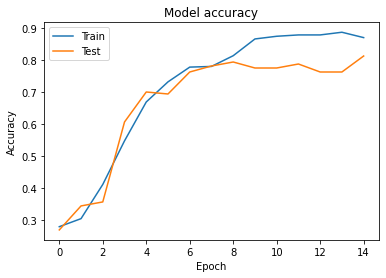

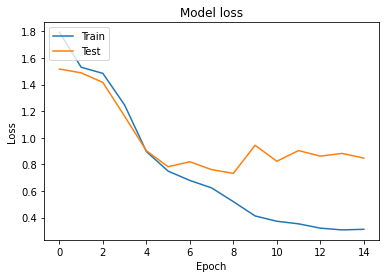

In [7]:
print(results.history)
# 6 훈련 과정 시각화 (정확도)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

(1, 48, 48, 3)

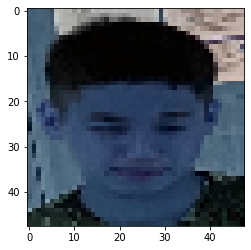

In [9]:
#test real image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("1.jpg")
img_resize = cv2.resize(img,(48,48))
plt.imshow(img_resize)

#shape 변환
#tf.keras는 한번에 샘플의 batch로 예측을 만드는데 최적화 되어 있어서
#배치 차원을 넣어줘야함
#이미지 하나만 하는데 추가 차원을 넣어줘야 한다면
#img = (np.expand_dims(img,0))
img_data_list = []
img_data_list.append(img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255



img_data.shape


In [10]:
#model predict
img_data.shape
predict = model.predict(img_data)

#getLabel()함수 이용
#np.argmax()는 가장 높은 확률 찾음
getLabel(np.argmax(predict))

'surprise'

In [35]:
def plot_image(predict, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predict)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(getLabel(predicted_label),
                                100*np.max(predict),
                                true_label,
                                color=color))
def plot_value_array(predict,true_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(5), predict[0], color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predict)

  thisplot[predicted_label].set_color('red')
  thisplot[names.index(true_label)].set_color('blue')

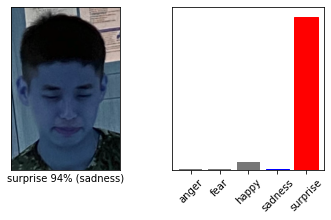

In [37]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(predict,'sadness' , img)
plt.subplot(1,2,2)
plot_value_array(predict,'sadness')
_ = plt.xticks(range(5),names, rotation =45)
plt.show()
